# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals

/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals


In [ ]:
### Guideline for convenience ###
# 압축 풀기
#!unzip /content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals10.zip

In [ ]:
cd /content/drive/MyDrive/DSL/2022-2/[0823]cnn/tire

/content/drive/MyDrive/DSL/2022-2/[0823]cnn/tire


In [ ]:
#!unzip /content/drive/MyDrive/DSL/2022-2/[0823]cnn/tire.zip

In [3]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [7]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

In [8]:
import os 

In [4]:
class_name_lst= os.listdir('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/Animals-10')

In [5]:
class_name_lst

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [6]:
numpic_per_class= [] 
for class_name in class_name_lst:
  tmp = os.path.join('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/Animals-10/',class_name )
  numpic = len(os.listdir(tmp))
  numpic_per_class.append(numpic)


numpic_per_class
  


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# test에 넣을 이미지 개수 계산
# flat_test_count = round(len(flat)*0.2)
# full_test_count = round(len(full)*0.2)
# no_tire_test_count = round(len(no_tire)*0.2)

# print(flat_test_count)
# print(full_test_count)
# print(no_tire_test_count)

In [7]:
# test에 넣을 이미지 개수 계산. 
test_num_per_class =  list(map(lambda x: round(x*0.3), numpic_per_class))
test_num_per_class

#30%

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# train, test 폴더 경로 선언 & 만들기

train_dir = os.path.join('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/','train')
test_dir = os.path.join('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/','test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
test_dir

'/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/test'

In [ ]:
import shutil
import glob

In [ ]:
class_name_lst

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [ ]:
test_num_per_class

[634, 500, 929, 560, 1459, 434, 787, 546, 1446, 559]

In [ ]:
!pwd

/content


In [ ]:
cd /content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals

/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals


In [ ]:
os.makedirs('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/custom_dataset')

In [ ]:
os.makedirs('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/custom_dataset/train/')
os.makedirs('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/custom_dataset/test/')


In [ ]:
directory_list = [
   '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/custom_dataset/test/',
    '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/custom_dataset/train/',
]

In [ ]:
def dataset_split(query,tmp_img_path , train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(tmp_img_path):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/Animals-10/'+query + '/' + file_name, '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/custom_dataset/test/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move('/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/Animals-10/'+query + '/' + file_name, '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/custom_dataset/test/' + query + '/' + file_name)
        cnt += 1

In [ ]:
for i, class_name in enumerate(class_name_lst):
  tmp_img_path= f'/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/Animals-10/{class_name}/'
  dataset_split(query = class_name,tmp_img_path=tmp_img_path, train_cnt = test_num_per_class[i] )


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [4]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


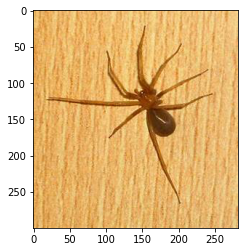

In [9]:
img_path  =  '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/train/spider/spider (4349).jpeg'
img = Image.open(img_path)
img_np = np.array(img)
imshow(img_np)

In [10]:
img_np.shape

(300, 282, 3)

(225, 300, 3)

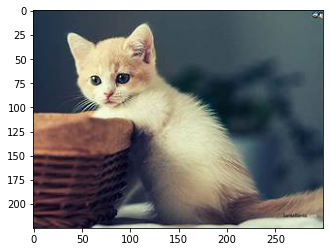

In [11]:
img_path  =  '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/train/cat/cat (1223).jpeg'
img = Image.open(img_path)
img_np = np.array(img)
imshow(img_np)
img_np.shape

In [ ]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
transform_animals10_train = transforms.Compose([
    transforms.ColorJitter(brightness=0.2),
    transforms.CenterCrop(256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [7]:
transform_animals10_test = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [65]:
# train, test에 대해 DataLoader 정의

In [8]:
train_data = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/train', 
    transform = transform_animals10_train 
)
test_data = torchvision.datasets.ImageFolder(
    root = '/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals/test',
    transform = transform_animals10_test
)

In [67]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

In [68]:
train_data[0][0].shape

torch.Size([3, 256, 256])

In [9]:
import torch.nn as nn

In [10]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3)),             # [batch_size,3,256,256] -> [batch_size,16,254,254]
            nn.ReLU(),
            nn.BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3,3)),            # [batch_size,16,254,254] -> [batch_size,32,252,252]
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=30,kernel_size=(3,3)),             # [batch_size,32,252,252] -> [batch_size,32,250,250]
            nn.Dropout(0.2), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), 
            nn.BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),                             # [batch_size,32,250,250] -> [batch_size,32,125,125]
            nn.Conv2d(in_channels=30, out_channels=30, kernel_size=(5,5), padding=(2,2)), # [batch_size,32,125,125] -> [batch_size,32,125,125] 
            nn.ReLU(),
            nn.Conv2d(in_channels=30, out_channels=50, kernel_size=(4,4)),            # [batch_size,32,125,125] -> [batch_size,32,122,122]
            nn.ReLU(),
            nn.Conv2d(in_channels=50, out_channels=60, kernel_size=(3,3)),            # [batch_size,32,122,122] -> [batch_size,32,120,120]
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),                                # [batch_size,32,120,120] -> [batch_size,32,60,60]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(60*60*60,100),                                                # [batch_size,32*60*60] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [71]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기

In [72]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

from torchsummary import summary
test_model = CNN_Model() # 모델 객체 선언
test_model.to('cuda')
summary(test_model, input_size= (3,256,256) ) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 10, 254, 254]             280
              ReLU-2         [-1, 10, 254, 254]               0
       BatchNorm2d-3         [-1, 10, 254, 254]              20
            Conv2d-4         [-1, 20, 252, 252]           1,820
              ReLU-5         [-1, 20, 252, 252]               0
            Conv2d-6         [-1, 30, 250, 250]           5,430
           Dropout-7         [-1, 30, 250, 250]               0
         MaxPool2d-8         [-1, 30, 125, 125]               0
       BatchNorm2d-9         [-1, 30, 125, 125]              60
           Conv2d-10         [-1, 30, 125, 125]          22,530
             ReLU-11         [-1, 30, 125, 125]               0
           Conv2d-12         [-1, 50, 122, 122]          24,050
             ReLU-13         [-1, 50, 122, 122]               0
           Conv2d-14         [-1, 60, 1

In [23]:
# Device 선언 (GPU 권장)

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [25]:
# 모델 객체 선언

In [13]:
my_Model = CNN_Model().to(device)

In [77]:
# loss func, optimizer 정의

In [14]:
import numpy as np
import json
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_Model.parameters(), 
                         lr = 0.001,
                         momentum=0.9,
                         weight_decay=1e-4)

In [46]:
#train 함수 정의 

In [16]:
seq_train_loss = []
seq_test_loss = [] 
seq_train_acc = []
seq_test_acc = []

In [17]:
num_epochs=40 

In [19]:
train_data_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 16,     
    shuffle=True,        
    num_workers=2
)
test_data_loader  = torch.utils.data.DataLoader(
    test_data,
    batch_size = 16,      
    shuffle=True,         
    num_workers=2
)

In [20]:
dataloaders={}
dataloaders['train']= train_data_loader
dataloaders['test'] =test_data_loader

In [21]:
save_path = !pwd

In [22]:
save_path

['/content/drive/MyDrive/DSL/2022-2/[0823]cnn/animals']

In [23]:
## Train 함수 정의

def train(model,epoch,optimizer,criterion,scheduler=None,save_every=None):
    ## 각 단계의 loss 및 accuracy 저장할 list 생성

    print(f'\n[ Train epoch: {epoch+1} ]')

    model.train() # Train 단계임을 선업

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(dataloaders['train']): # Train data 가져오기
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어준다
      
        optimizer.zero_grad() # gradient 초기화
        outputs = model(inputs) # Prediction value 계산 (Output 계산)
        loss = criterion(outputs, targets) # outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update
        if scheduler != None:
            if batch_idx in [80, 160, 200]:
                scheduler.step() # Scheduler update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 50 == 49:
            ## 학습 중간 성능 확인
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 50 batches: {running_loss / 50}') 
            running_loss = 0.0

        if save_every != None:
         if (batch_idx % save_every == 0): # 얼마만큼의 iteration마다 저장할 것인지를 설정
              directory = os.path.join(save_path, 'Resnet') # 경로 설정
              if not os.path.exists(directory): # 경로가 없다면 새로 만듦
                  os.makedirs(directory)
              torch.save({ 
                  # 학습 중간에 저장하려 하는 모든 것들을 dict로 서술
                  'epoch': epoch, 
                  'iteration': batch_idx,
                  'model': model.state_dict(),
                  'opt': optimizer.state_dict(),
                  'loss': loss
                  #,'sch': scheduler.state_dict()
                  }, os.path.join(directory, '{}ep_{}iter_{}.tar'.format(epoch,batch_idx,'checkpoint')))

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [31]:
# test 함수 정의

In [24]:
def test(model,epoch,criterion):
    print(f'\n[ Test epoch: {epoch+1} ]')

    model.eval() # Test time임을 선언

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(dataloaders['test']):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [37]:
# training

In [88]:
num_epochs =40

In [25]:
for epoch in range(0,num_epochs):
  train(my_Model,epoch,optimizer,criterion)
  test(my_Model,epoch,criterion)


[ Train epoch: 1 ]

Current batch: 50
Average train loss of recent 50 batches: 2.238973078727722

Current batch: 100
Average train loss of recent 50 batches: 2.1516012263298037

Current batch: 150
Average train loss of recent 50 batches: 2.0981312704086306

Current batch: 200
Average train loss of recent 50 batches: 2.02418888092041

Current batch: 250
Average train loss of recent 50 batches: 1.9623451542854309

Current batch: 300
Average train loss of recent 50 batches: 1.879568145275116

Current batch: 350
Average train loss of recent 50 batches: 1.9516274261474609

Current batch: 400
Average train loss of recent 50 batches: 1.8571020245552063

Current batch: 450
Average train loss of recent 50 batches: 1.8204289531707765

Current batch: 500
Average train loss of recent 50 batches: 1.7595861053466797

Total train accuarcy: 30.611506452780123
Total train loss: 1.9706741612770653

[ Test epoch: 1 ]

Test accuarcy: 34.74576271186441
Test average loss: 1.950797159856746

[ Train epoch: 

KeyboardInterrupt: ignored

In [ ]:
# loss, accuracy 추이 확인 with plt.plot

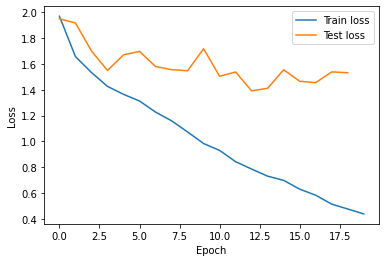

In [29]:
plt.plot(range(20), seq_train_loss, label="Train loss")
plt.plot(range(19), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

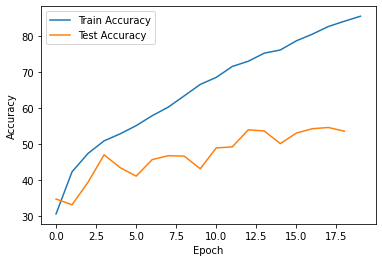

In [28]:
plt.plot(range(20), seq_train_acc, label="Train Accuracy")
plt.plot(range(19), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()